# Twitter Sentiment Analysis using Machine Learning

---

### Project Overview
This project analyzes public sentiment on Twitter (X) data using a supervised machine learning approach. The goal is to classify tweets into **Positive** or **Negative** categories to understand the public mood on specific topics.

### Technical Workflow
* **Dataset:** Sentiment140 (1.6 Million labeled tweets).
* **Preprocessing:** NLP techniques including Stopword removal, Regex cleaning, and Porter Stemming.
* **Vectorization:** TF-IDF (Term Frequency-Inverse Document Frequency) with 50,000 features.
* **Model:** Logistic Regression (optimized for text classification).
* **Performance:** Achieved a solid accuracy of **77.77%**.

### Key Insights
* **Top Positive Indicators:** Words like *thank*, *smile*, and *welcome*.
* **Top Negative Indicators:** Words like *sad*, *poor*, and *sick*.

# Import All Important Libraries

In [18]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Load DataSet

### Dataset Source
The dataset used in this project is the **Sentiment140** dataset, which is too large for GitHub (227MB). 
You can download it from Kaggle here: https://www.kaggle.com/code/tomconder/starter-sentiment140-dataset-with-1-6-b4acb3fc-1/input

## Preprocessing

In [5]:
cols = ["target", "ids", "date", "flag", "user", "text"]
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1',names=cols)

In [6]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
df["target"].unique()

array([0, 4], dtype=int64)

In [8]:
# 4 Convert into 1 (1 Means Positive) 
df['target'] = df['target'].replace(4, 1)

# now all lables convert in to 0 and 1 (0 Negative) (1 Positive)
print("New Unique Labels:", df['target'].unique())

# now check data is balanced or not
print(df['target'].value_counts())

New Unique Labels: [0 1]
target
0    800000
1    800000
Name: count, dtype: int64


In [9]:
df["target"].unique()

array([0, 1], dtype=int64)

In [10]:
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # 1. Clean URLs, Mentions, and Non-alphabetic characters
    text = re.sub(r"http\S+|www\S+|@\w+|[^a-zA-Z\s]", "", text).lower()
    # 2. Tokenize, Remove Stopwords, and Stemming
    words = text.split()
    cleaned_words = [stemmer.stem(w) for w in words if w not in stop_words]
    return " ".join(cleaned_words)

df['cleaned_text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to C:\Users\Arsalan
[nltk_data]     Khatri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Start Machine Learning Model Training

In [11]:
# 1. Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['target'], test_size=0.2, random_state=42)

# 2. Vectorization
vectorizer = TfidfVectorizer(max_features=50000) # Top 50k words use honge
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 3. Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# 4. Accuracy Check
y_pred = model.predict(X_test_tfidf)
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Accuracy: 77.77%


# Save ML Model .pkl file

In [12]:
# 1. Now saved our trained Model
with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# 2. Save Vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

print("Model and Vectorizer saved successfully!")

Model and Vectorizer saved successfully!


# Create a Function check_sentiment() Give Reusability

In [17]:
def check_sentiment(text):
    # Load model and vectorizer
    m = pickle.load(open('sentiment_model.pkl', 'rb'))
    v = pickle.load(open('vectorizer.pkl', 'rb'))
    
    # Predict
    cleaned = preprocess_text(text) # Use the cleaning function we made
    vec = v.transform([cleaned])
    res = m.predict(vec)
    
    return "Positive 😊" if res[0] == 1 else "Negative ☹️"

# Test
print(check_sentiment("I kill you"))
print(check_sentiment("I have gift for you"))

Negative ☹️
Positive 😊


# Visualization Top 10 Positive And Negative Words

C:\Users\Arsalan Khatri\AppData\Local\Temp\ipykernel_6672\1107903303.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=top_positive, palette='Greens_d')
C:\Users\Arsalan Khatri\AppData\Local\Temp\ipykernel_6672\1107903303.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='word', data=top_negative, palette='Reds_d')


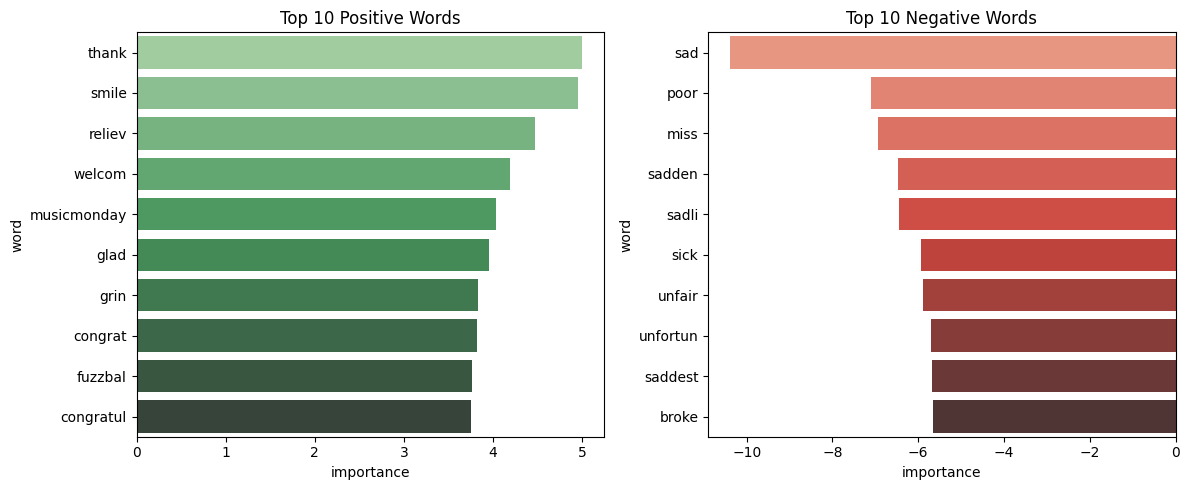

In [14]:
# If you used 'vectorizer' and 'model' as names in the training cell:
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# Create a DataFrame and sort the values.
word_importance = pd.DataFrame({'word': feature_names, 'importance': coefficients})

# Top 10 words identified as 'Positive' by the model.
top_positive = word_importance.sort_values(by='importance', ascending=False).head(10)

# Top 10 words identified as 'Negative' by the model.
top_negative = word_importance.sort_values(by='importance', ascending=True).head(10)

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='importance', y='word', data=top_positive, palette='Greens_d')
plt.title('Top 10 Positive Words')

plt.subplot(1, 2, 2)
sns.barplot(x='importance', y='word', data=top_negative, palette='Reds_d')
plt.title('Top 10 Negative Words')
plt.tight_layout()
plt.show()